# PREDICTION OF ‘TYPE1 DIABETES’

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Diabetes_Type1.csv')

In [3]:
data.head(2)

,Age,Sex,Area of Residence,HbA1c,Height,Weight,BMI,Duration of disease,Other diease,Adequate Nutrition,...,Standardized birth weight,Autoantibodies,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemis,pancreatic disease affected in child,Affected
0,greater then 15,Female,Suburban,Over 7.5%,1.50,56.0,24.888889,4y,no,No,...,Middle quartiles,Yes,Yes,Yes,Injection,Yes,No,Yes,Yes,0
1,greater then 15,Female,Suburban,Over 7.5%,1.48,58.0,26.479182,1w,none,No,...,Middle quartiles,Yes,No,Yes,Injection,Yes,Yes,Yes,Yes,1


In [4]:
SexColumnDummy = pd.get_dummies(data['Sex'])
data = pd.concat((data,SexColumnDummy), axis=1)
data = data.drop(['Sex'], axis=1)

In [5]:
data.head(2)

,Age,Area of Residence,HbA1c,Height,Weight,BMI,Duration of disease,Other diease,Adequate Nutrition,Education of Mother,...,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemis,pancreatic disease affected in child,Affected,Female,Male
0,greater then 15,Suburban,Over 7.5%,1.50,56.0,24.888889,4y,no,No,No,...,Yes,Yes,Injection,Yes,No,Yes,Yes,0,1,0
1,greater then 15,Suburban,Over 7.5%,1.48,58.0,26.479182,1w,none,No,No,...,No,Yes,Injection,Yes,Yes,Yes,Yes,1,1,0


In [6]:
AgeColumnDummy = pd.get_dummies(data['Age'])
data = pd.concat((data,AgeColumnDummy), axis=1)
data = data.drop(['Age'], axis=1)

In [7]:
data = data.drop(['Area of Residence '], axis=1)

In [8]:
HbA1cofResidenceColumnDummy = pd.get_dummies(data['HbA1c'])
data = pd.concat((data,HbA1cofResidenceColumnDummy), axis=1)
data = data.drop(['HbA1c'], axis=1)

In [9]:
data = data.drop(['Duration of disease'], axis=1)

In [10]:
OtherdieaseColumnDummy = pd.get_dummies(data['Other diease'])
data = pd.concat((data,OtherdieaseColumnDummy), axis=1)
data = data.drop(['Other diease'], axis=1)

In [11]:
AdequateNutritionColumnDummy = pd.get_dummies(data['Adequate Nutrition '])
data = pd.concat((data,AdequateNutritionColumnDummy), axis=1)
data = data.drop(['Adequate Nutrition '], axis=1)

In [12]:
data = data.drop(['Education of Mother'], axis=1)

In [13]:
StandardizedgrowthrateininfancyColumnDummy = pd.get_dummies(data['Standardized growth-rate in infancy'])
data = pd.concat((data,StandardizedgrowthrateininfancyColumnDummy), axis=1)
data = data.drop(['Standardized growth-rate in infancy'], axis=1)

In [14]:
StandardizedbirthweightColumnDummy = pd.get_dummies(data['Standardized birth weight'])
data = pd.concat((data,StandardizedbirthweightColumnDummy), axis=1)
data = data.drop(['Standardized birth weight'], axis=1)

In [15]:
AutoantibodiesColumnDummy = pd.get_dummies(data['Autoantibodies'])
data = pd.concat((data,AutoantibodiesColumnDummy), axis=1)
data = data.drop(['Autoantibodies'], axis=1)

In [16]:
ImpairedglucosemetabolismColumnDummy = pd.get_dummies(data['Impaired glucose metabolism '])
data = pd.concat((data,SexColumnDummy), axis=1)
data = data.drop(['Impaired glucose metabolism '], axis=1)

In [17]:
InsulintakenColumnDummy = pd.get_dummies(data['Insulin taken'])
data = pd.concat((data,InsulintakenColumnDummy), axis=1)
data = data.drop(['Insulin taken'], axis=1)

In [18]:
data = data.drop(['How Taken'], axis=1)

In [19]:
FamilyHistoryaffectedinType1DiabetesColumnDummy = pd.get_dummies(data['Family History affected in Type 1 Diabetes'])
data = pd.concat((data,FamilyHistoryaffectedinType1DiabetesColumnDummy), axis=1)
data = data.drop(['Family History affected in Type 1 Diabetes'], axis=1)

In [20]:
FamilyHistoryaffectedinType2DiabetesColumnDummy = pd.get_dummies(data['Family History affected in Type 2 Diabetes'])
data = pd.concat((data,FamilyHistoryaffectedinType2DiabetesColumnDummy), axis=1)
data = data.drop(['Family History affected in Type 2 Diabetes'], axis=1)

In [21]:
HypoglycemisColumnDummy = pd.get_dummies(data['Hypoglycemis'])
data = pd.concat((data,HypoglycemisColumnDummy), axis=1)
data = data.drop(['Hypoglycemis'], axis=1)

In [22]:
pancreaticdiseaseaffectedinchildColumnDummy = pd.get_dummies(data['pancreatic disease affected in child '])
data = pd.concat((data,SexColumnDummy), axis=1)
data = data.drop(['pancreatic disease affected in child '], axis=1)

In [23]:
data.head(2)

,Height,Weight,BMI,Affected,Female,Male,Less then 11,Less then 15,Less then 5,greater then 15,...,No,Yes,No,Yes,No,Yes,No,Yes,Female,Male
0,1.50,56.0,24.888889,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,1,1,0
1,1.48,58.0,26.479182,1,1,0,0,0,0,1,...,0,1,0,1,0,1,0,1,1,0


In [24]:
features = data.columns

In [25]:
features = [x for x in features if x != 'Affected']

In [26]:
train, test = train_test_split(data, test_size = 0.25)
print(len(data))
print(len(train))
print(len(test))

65495
49121
16374


# DECISION TREE

In [27]:
dt = DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [28]:
x_train = train[features]
y_train = train["Affected"]

x_test = test[features]
y_test = test["Affected"]

In [29]:
dt = dt.fit(x_train, y_train)

In [30]:
y_pred = dt.predict(x_test)

### ACCURACY

In [31]:
score = accuracy_score(y_test, y_pred)*100
print("Accuracy using desicion Tree: ", round(score, 2), "%" )

Accuracy using desicion Tree:  93.29 %


### CONFUSION MATRIX

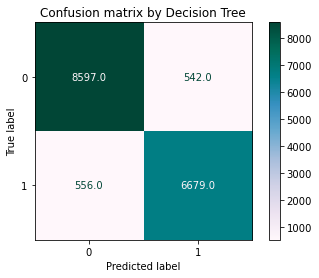

In [32]:
plot_confusion_matrix(dt, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by Decision Tree")
plt.show()

### CLASSIFICATION REPORT

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9139
           1       0.92      0.92      0.92      7235

    accuracy                           0.93     16374
   macro avg       0.93      0.93      0.93     16374
weighted avg       0.93      0.93      0.93     16374



### TREE

In [34]:
!pip install graphviz

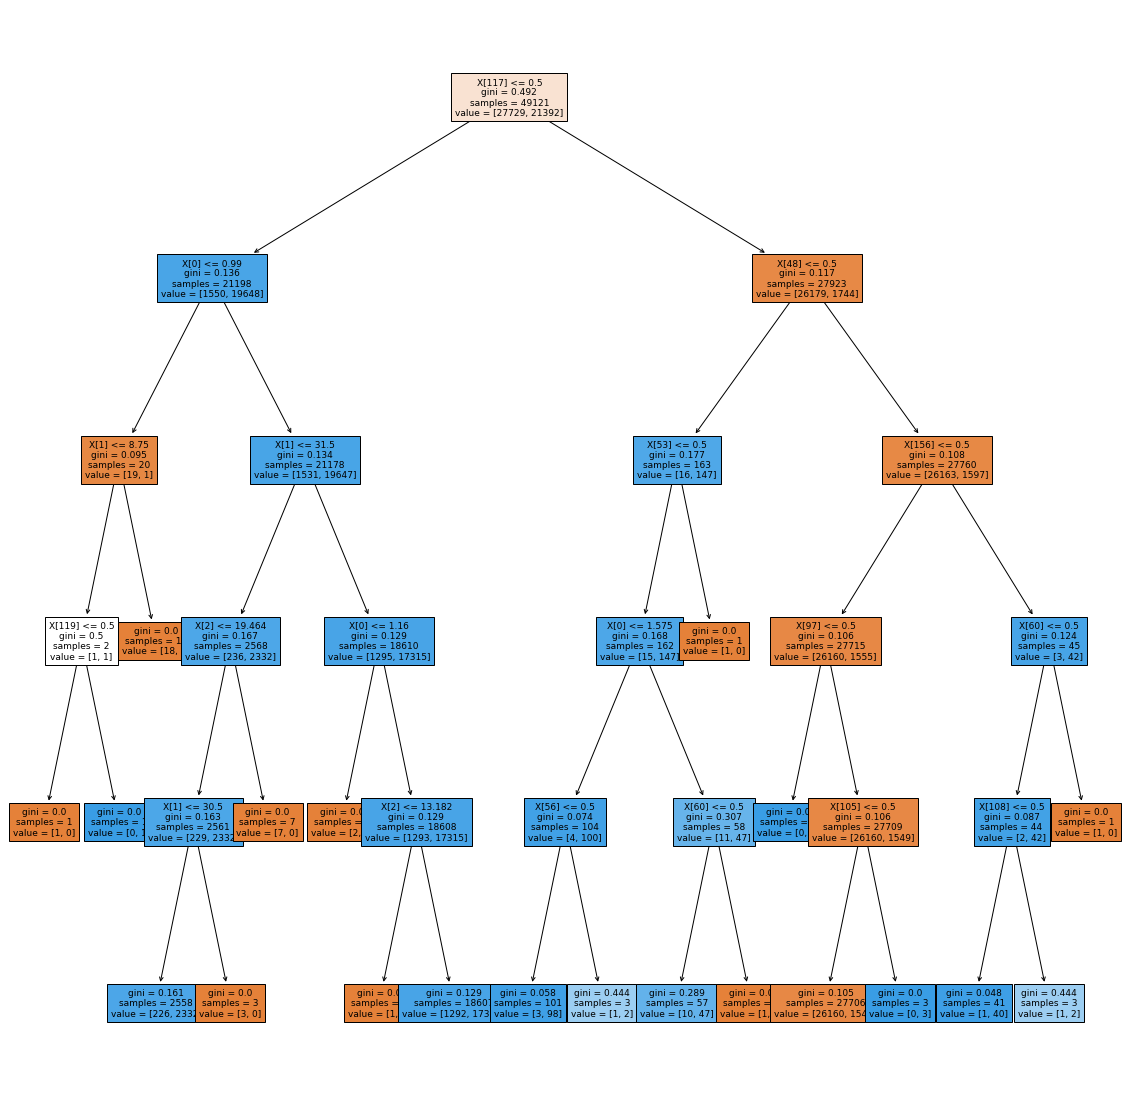

In [35]:
plt.figure(figsize=(20,20))
clf = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train)
plot_tree(clf,filled=True,fontsize=9)
plt.show()

# RANDOM FOREST

In [36]:
rf = RandomForestClassifier(n_estimators=100,max_depth=9)

In [37]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

### ACCURACY

In [38]:
score1 = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy using random forest:",round(score1, 2), "%")

Accuracy using random forest: 93.33 %


### CONFUSION MATRIX

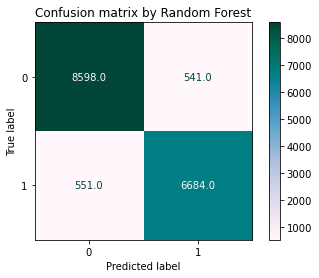

In [39]:
plot_confusion_matrix(rf, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by Random Forest")
plt.show()

### CLASSIFICATION REPORT

In [40]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9139
           1       0.93      0.92      0.92      7235

    accuracy                           0.93     16374
   macro avg       0.93      0.93      0.93     16374
weighted avg       0.93      0.93      0.93     16374



# Naive Bayes

In [41]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

### ACCURACY

In [42]:
score2 = accuracy_score(y_test, y_pred_nb)*100
print("Accuracy using naive bayes:",round(score2, 2), "%")

Accuracy using naive bayes: 89.15 %


### CONFUSION MATRIX

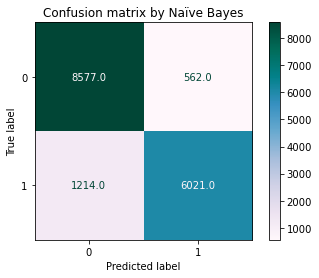

In [43]:
plot_confusion_matrix(nb, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by Naïve Bayes")
plt.show()

### CLASSIFICATION REPORT

In [44]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9139
           1       0.91      0.83      0.87      7235

    accuracy                           0.89     16374
   macro avg       0.90      0.89      0.89     16374
weighted avg       0.89      0.89      0.89     16374

